---
title: "Kaggle_exercise_01"
author: "minstar"
date: "2023-05-02"
categories: [python]
---
kaggle 문제풀이 01
https://www.kaggle.com/code/lsiina/exercise-your-first-map/edit

**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/your-first-map).**

---

이 페이지는 위의 코드를 chat-gpt를 이용하여 한국어로 번역하고 문제풀이를 했다. 
원문이 궁금하다면 위의 링크를 이용하길 바란다.

# Introduction

[Kiva.org](https://www.kiva.org/)는 전 세계의 가난한 사람들에게 금융 서비스를 제공하는 온라인 크라우드펀딩 플랫폼입니다. Kiva 대출자들은 2백만 명 이상에게 10억 달러 이상의 대출을 제공했습니다.



<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2G8C53X.png" width="500"><br/>
</center>

Kiva는 "필드 파트너"라는 글로벌 네트워크를 통해 세계에서 가장 외지에 위치한 지역에까지 도달합니다. 이들 파트너는 대출자를 검증하고 서비스를 제공하며 대출을 관리하는 지역 단체입니다.
이번 연습에서는 필리핀에서의 Kiva 대출을 조사할 것입니다. Kiva의 현재 네트워크 범위를 벗어나는 지역을 파악하여 새로운 필드 파트너 모집 기회를 식별할 수 있는지 확인해보세요.
시작하려면 아래 코드 셀을 실행하여 피드백 시스템을 설정하세요.





In [ ]:
#!pip install geopandas  # 코랩은 이거만 해도 댐

In [2]:
import geopandas as gpd

### 1) 데이터 가져오기.

다음 셀을 사용하여 `loans_filepath`에서 로드된 shapefile을 사용하여 GeoDataFrame `world_loans`를 생성하세요.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
loans_filepath = "/content/drive/MyDrive/2023 데이터마이닝/dataset/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


### 2) 데이터 시각화하기.

다음 코드 셀을 수정하지 않고 실행하여 국가 경계를 포함하는 `world` GeoDataFrame을 로드하세요.

In [6]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


`world`와 `world_loans` GeoDataFrame을 사용하여 전 세계 Kiva 대출 위치를 시각화하세요.

<Axes: >

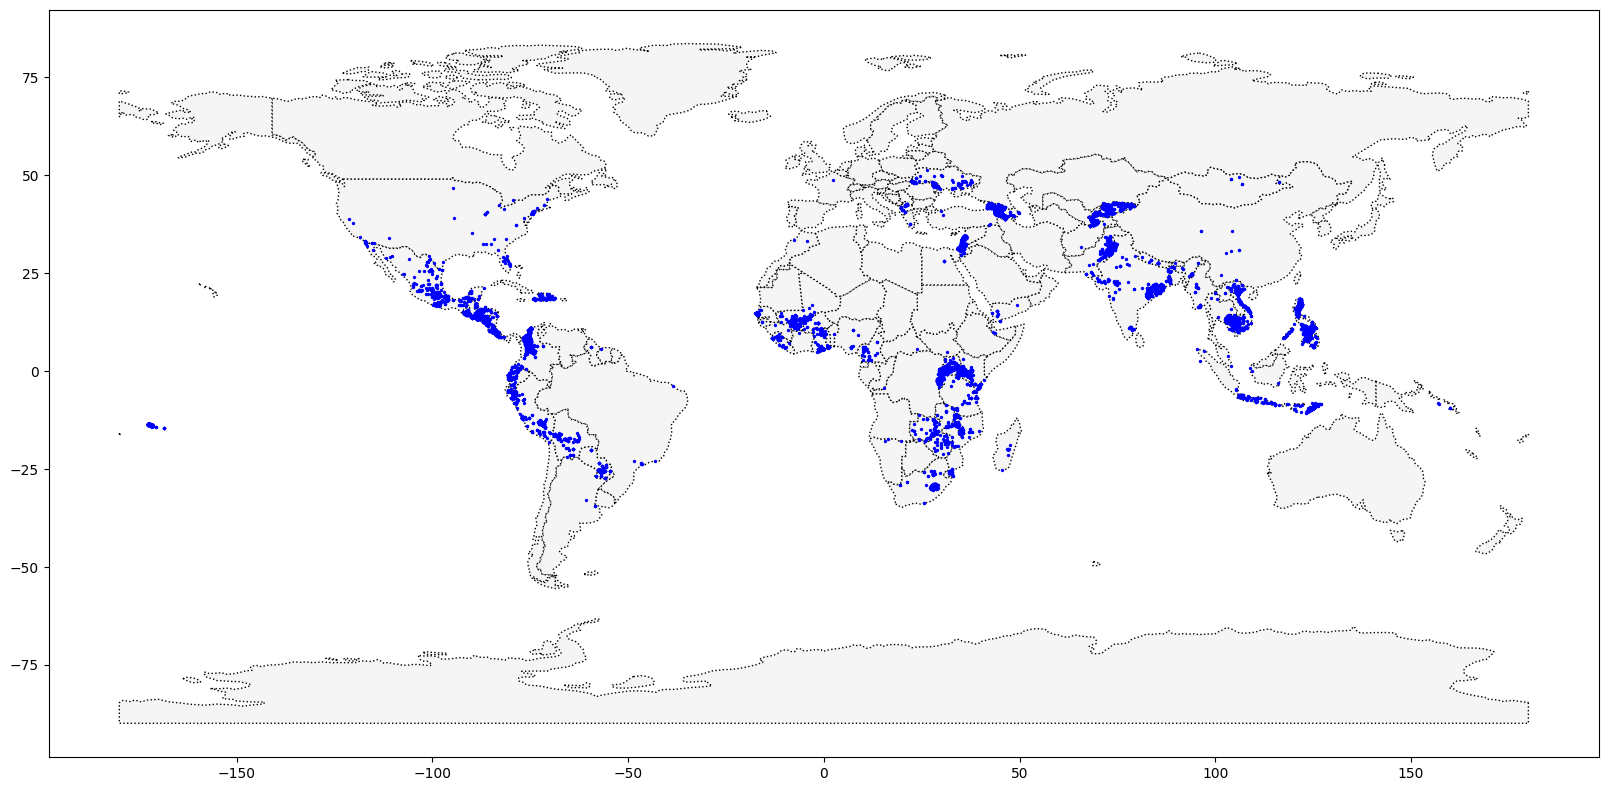

In [7]:
# Define a base map with county boundaries
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')

# Add wild lands, campsites, and foot trails to the base map
world_loans.plot(color='blue', ax=ax, markersize=2)

### 3) 필리핀을 기반으로 하는 대출 선택하기.

이제 필리핀에 기반을 둔 대출에 초점을 맞출 것입니다. 다음 코드 셀을 사용하여 필리핀에 기반을 둔 대출이 포함된 `world_loans`의 모든 행을 포함하는 GeoDataFrame인 `PHL_loans`을 만드세요.

In [8]:
world_loans

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)
...,...,...,...,...,...,...,...
13657,539,"N/A, direct to Sevamob",DSE Direct,Health,South Africa,50000,POINT (29.60355 -25.94599)
13658,540,"N/A, direct to Sanergy",DSE Direct,Water and Sanitation,Kenya,50000,POINT (36.82195 -1.29207)
13659,542,N/A direct to BioLite Inc.,DSE Direct,Clean Cookstove,Uganda,50000,POINT (32.58252 0.34760)
13660,543,N/A direct to LegWorks Inc.,DSE Direct,Health,Canada,50000,POINT (-79.38318 43.65323)


In [9]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country=='Philippines'].copy()
PHL_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


### 4) 필리핀의 대출 이해하기.

필리핀의 대출 이해하기.
다음 코드 셀을 수정하지 않고 실행하여 필리핀의 모든 섬의 경계를 포함하는 `PHL` GeoDataFrame을 로드하세요.

In [10]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/content/drive/MyDrive/2023 데이터마이닝/dataset/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


`PHL`과 `PHL_loans` GeoDataFrame을 사용하여 필리핀의 대출을 시각화하세요.

<Axes: >

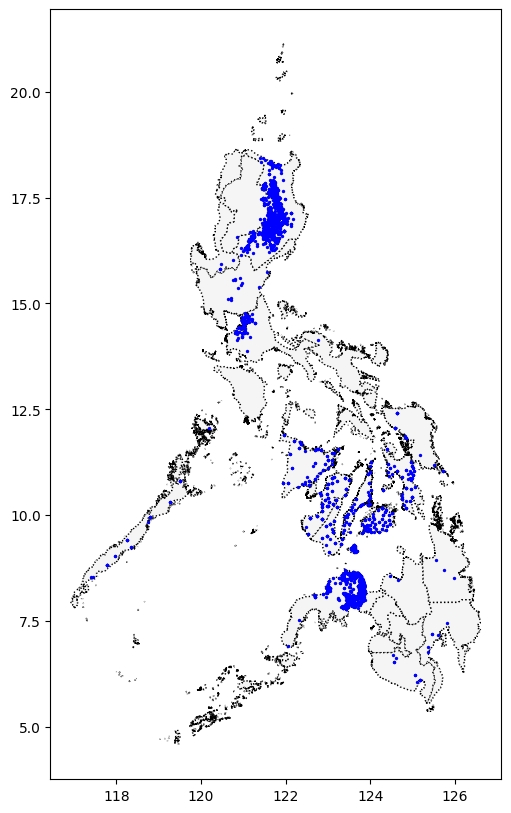

In [12]:
# Your code here
ax1 = PHL.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(color='blue', ax=ax1, markersize=2)

어떤 섬에서 새로운 필드 파트너를 모집하는 것이 유용할지 식별할 수 있나요?  
Kiva의 도달 범위를 벗어나 보이는 섬이 있나요?  
이 질문에 대한 답변을 찾는 데 [이 맵](https://bit.ly/2U2G7x7)이 유용할 수 있습니다.





사각화 된 데이터를 보고 위의 문제에 대한 답을 하자면 내 생각은 다음과 같다.  
대출 받은 사람을 관리하는 파트너를 모집하는 것이라면 당연히 점이 많이 찍힌 섬들로 가야겠지만. (아마도 이 문제에선 이걸 원하는 것은 아닐것이다.)  
아직 대출을 받지 않은 사람들 중에서 대출을 받고자하는 사람들을 찾는 관리자를 원한다면 점이 찍히지 않은 빈 섬으로 가야겠지...  
다만 빈 섬들중에서 어떤 섬이 인구가 많은가(가능하면 대출을 원하는 인구가 많아야함)
를 추가적으로 탐색하는게 좋아보이는데 이는 인구수도 같이 찍어보면 좋지 않을까..?  
추가적으로 해당 지역의 평균 소득도 데이터가 있다면 같이 살펴보면 좋을듯하다.

이를 한줄로 정리하자면  
필리핀 중앙의 mindoro 섬이나 남쪽의 큰 섬을 공략해보는게 좋을듯 하다.

다음에 진행할 연습문제 **[coordinate reference systems](https://www.kaggle.com/alexisbcook/coordinate-reference-systems)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*